In [59]:
# FILL IN THESE VALUES WITH YOUR OWN KEYS
client_id = "a8a7c3fd253a410aaf6ae44500d0ed9e"
client_secret = "cd17756f466c42f791b3ddaa520b6c7c"

# Make sure to add this on "Edit Settings" in your Dashboard
redirect_uri = "http://localhost:9000"

In [60]:
# !pip install spotipy

In [61]:
# Importing necessary libraries
import spotipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from spotipy.oauth2 import SpotifyOAuth

In [62]:
# Connect with API Keys created earlier
scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=client_id,
                                              client_secret=client_secret,
                                              redirect_uri=redirect_uri))

In [63]:
# Running this should open a new tab, click "agree"
results = sp.current_user_recently_played()

In [64]:
type(results)

dict

In [65]:
results.keys()

dict_keys(['items', 'next', 'cursors', 'limit', 'href'])

In [66]:
for idx, item in enumerate(results['items']):
    track_id = item['track']
    track_name = track_id['name']
    # This assumes one artist name, but its a list for collabs
    artist_name = track_id['artists'][0]['name']
    
    print(f"{idx}.) {track_name} by {artist_name}")

# Taylor Swift Albums

Let’s now shift gears to focus on a single artist – Taylor Swift who recently released a new album. Go to spotify.com and then look up the artist, you should see the ID in the URL.


In [67]:
taylor_swift = sp.artist("06HL4z0CvFAxyc27GXpf02")

In [68]:
taylor_swift

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 62457620},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

Taylor's albums

In [69]:
taylor_albums = sp.artist_albums(taylor_swift['id'],limit=50)

In [70]:
for album in taylor_albums['items']:
    print(f"Album: {album['name']} -- ID: {album['id']}")

Album: Midnights (3am Edition) -- ID: 3lS1y25WAhcqJDATJK70Mq
Album: Midnights (3am Edition) -- ID: 4894htPwC6zoiuTqUQwn4I
Album: Midnights -- ID: 151w1FgRZfnKZA9FEcg9Z3
Album: Midnights -- ID: 4moVP48t9bji7djUc5VOvi
Album: Red (Taylor's Version) -- ID: 6kZ42qRrzov54LcAk4onW9
Album: Red (Taylor's Version) -- ID: 6x9s2ObPdpATZgrwxsk9c0
Album: Fearless (Taylor's Version) -- ID: 4hDok0OAJd57SGIT8xuWJH
Album: evermore (deluxe version) -- ID: 6AORtDjduMM3bupSWzbTSG
Album: evermore (deluxe version) -- ID: 1DT6fDJL6AWPJxe7Lq1dPb
Album: evermore -- ID: 2Xoteh7uEpea4TohMxjtaq
Album: evermore -- ID: 5jmVg7rwRcgd6ARPAeYNSm
Album: folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] -- ID: 0PZ7lAru5FDFHuirTkWe9Z
Album: folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] -- ID: 3VaaZ7OIbGLi60NVsnueoo
Album: folklore (deluxe version) -- ID: 1pzvBxYgT6OVwJLtHkrdQK
Album: folklore (deluxe version) -- ID: 7v7pe5vZQPWB5zW0JrKRiw
Album: folklo

# Cleaning the Data

Looks like we have a few issues, here, due to Taylor Swift re-releasing album’s via her “Taylor Edition” and also having many “special edition” versions of albums, we have duplicate entries. Let’s drop these duplicates and create a clean list of album ids:


In [71]:
album['name']

'Carolina (From The Motion Picture “Where The Crawdads Sing”)'

In [72]:
album_names = []
albums = []

for album in taylor_albums['items']:
    album_name = album['name']
    album_id = album['id']
    # Clean out the duplicates
    if album_name[:3] not in album_names and "remix" not in album_name and "Karaoke" not in album_name and "Live" not in album_name:
        album_names.append(album_name[:3] )
        albums.append((album_name,album_id))

In [73]:
albums

[('Midnights (3am Edition)', '3lS1y25WAhcqJDATJK70Mq'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv'),
 ('1989', '2QJmrSgbdM35R67eoGQo4j'),
 ('Speak Now', '5MfAxS5zz8MlfROjGQVXhy'),
 ('Taylor Swift', '7mzrIsaAjnXihW3InKjlC3'),
 ('Anti-Hero (Acoustic Version)', '5vgWXUueeEU2labRz6TlNv'),
 ('Carolina (From The Motion Picture “Where The Crawdads Sing”)',
  '5Bwg2XxrjTlrNy6BC7KQZf')]

We can see that there are a few singles or EPs here, let’s go ahead and just slice those out:

In [74]:
final_album_list = albums[:-5]

In [75]:
final_album_list

[('Midnights (3am Edition)', '3lS1y25WAhcqJDATJK70Mq'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv')]

# Songs from Taylor’s Albums

In [76]:
taylor_song_ids = []

for album_name, album_id in final_album_list:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_name = track['name']
        track_id = track['id']
        taylor_song_ids.append((album_name,album_id,track_name,track_id))

In [77]:
taylor_song_ids[0]

('Midnights (3am Edition)',
 '3lS1y25WAhcqJDATJK70Mq',
 'Lavender Haze',
 '4g2c7NoTWAOSYDy44l9nub')

In [78]:
len(taylor_song_ids)

160

# Song Features

Spotify has machine generated features for songs, let’s grab them with the API.

In [79]:
# Test out one song:
features = sp.audio_features(tracks=['4g2c7NoTWAOSYDy44l9nub'])

In [80]:
features

[{'danceability': 0.735,
  'energy': 0.444,
  'key': 10,
  'loudness': -10.519,
  'mode': 1,
  'speechiness': 0.0684,
  'acousticness': 0.204,
  'instrumentalness': 0.0012,
  'liveness': 0.17,
  'valence': 0.0984,
  'tempo': 97.038,
  'type': 'audio_features',
  'id': '4g2c7NoTWAOSYDy44l9nub',
  'uri': 'spotify:track:4g2c7NoTWAOSYDy44l9nub',
  'track_href': 'https://api.spotify.com/v1/tracks/4g2c7NoTWAOSYDy44l9nub',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4g2c7NoTWAOSYDy44l9nub',
  'duration_ms': 202396,
  'time_signature': 4}]

In [81]:
pd.Series(features[0])

danceability                                                    0.735
energy                                                          0.444
key                                                                10
loudness                                                      -10.519
mode                                                                1
speechiness                                                    0.0684
acousticness                                                    0.204
instrumentalness                                               0.0012
liveness                                                         0.17
valence                                                        0.0984
tempo                                                          97.038
type                                                   audio_features
id                                             4g2c7NoTWAOSYDy44l9nub
uri                              spotify:track:4g2c7NoTWAOSYDy44l9nub
track_href          

In [82]:
# Getting features for all Taylor Swift songs
df = pd.DataFrame()

for album_name,album_id,track_name, track_id in taylor_song_ids:
    features = sp.audio_features(tracks=[track_id])[0]
    features['album_name'] = album_name
    features['album_id'] = album_id
    features['track_name'] = track_name
    ser = pd.Series(features)
    df = pd.concat([df,ser],axis=1)

In [83]:
# Tranpose to fix concat issue due to axis=1
df = df.transpose().set_index('id')
df.head()[['danceability', 'energy', 'key', 'acousticness','album_name','track_name']]

,danceability,energy,key,acousticness,album_name,track_name
id,,,,,,
4g2c7NoTWAOSYDy44l9nub,0.735,0.444,10,0.204,Midnights (3am Edition),Lavender Haze
199E1RRrVmVTQqBXih5qRC,0.658,0.378,7,0.0593,Midnights (3am Edition),Maroon
02Zkkf2zMkwRGQjZ7T4p8f,0.638,0.634,4,0.133,Midnights (3am Edition),Anti-Hero
6ADDIJxxqzM9LMpm78yzQG,0.659,0.323,9,0.735,Midnights (3am Edition),Snow On The Beach (feat. Lana Del Rey)
7gVWKBcfIW93YxNBi3ApIE,0.694,0.38,2,0.416,Midnights (3am Edition),"You're On Your Own, Kid"


# Visualizing the songs

Let’s explore how much Taylor’s music varies from album to album. We’ll begin by creating a dataframe that consists only of the Spotify audio features:

In [84]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'album_name', 'album_id', 'track_name'],
      dtype='object')

In [85]:
# Taking only the features
data_features = df.drop(['type', 'uri', 'track_href', 'analysis_url','album_name', 'album_id', 'track_name'],axis=1)

In [86]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,160.000,160.000,160,160.000,160,160.000,160.000
unique,139.000,142.000,12,158.000,2,133.000,150.000
top,0.546,0.444,0,-10.813,1,0.031,0.204
freq,3.000,2.000,35,2.000,144,5.000,2.000


In [87]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 4g2c7NoTWAOSYDy44l9nub to 7F5oktn5YOsR9eR5YsFtqb
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      160 non-null    object
 1   energy            160 non-null    object
 2   key               160 non-null    object
 3   loudness          160 non-null    object
 4   mode              160 non-null    object
 5   speechiness       160 non-null    object
 6   acousticness      160 non-null    object
 7   instrumentalness  160 non-null    object
 8   liveness          160 non-null    object
 9   valence           160 non-null    object
 10  tempo             160 non-null    object
 11  duration_ms       160 non-null    object
 12  time_signature    160 non-null    object
dtypes: object(13)
memory usage: 17.5+ KB




It looks like our columns are still str objects, let’s change them to float:


In [88]:
for col in data_features.columns:
    data_features[col] = data_features[col].apply(float)

In [89]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.584944,0.518119,4.537500,-8.562563,0.900000,0.059819,0.421950
std,0.117549,0.185716,3.463897,2.652989,0.300942,0.059719,0.359898
min,0.292000,0.131000,0.000000,-15.434000,0.000000,0.025000,0.000191
25%,0.511750,0.375500,1.000000,-10.543250,1.000000,0.031000,0.057925
50%,0.598000,0.534000,5.000000,-8.494000,1.000000,0.039900,0.347500
75%,0.660250,0.673500,7.000000,-6.497250,1.000000,0.057825,0.809500
max,0.897000,0.909000,11.000000,-3.669000,1.000000,0.519000,0.971000


Plotting acoustic music quality

If you’re a true “Swiftie”, then you know some albums sound way more acoustic than others, let’s explore the data features to see if that is reflected in the data:


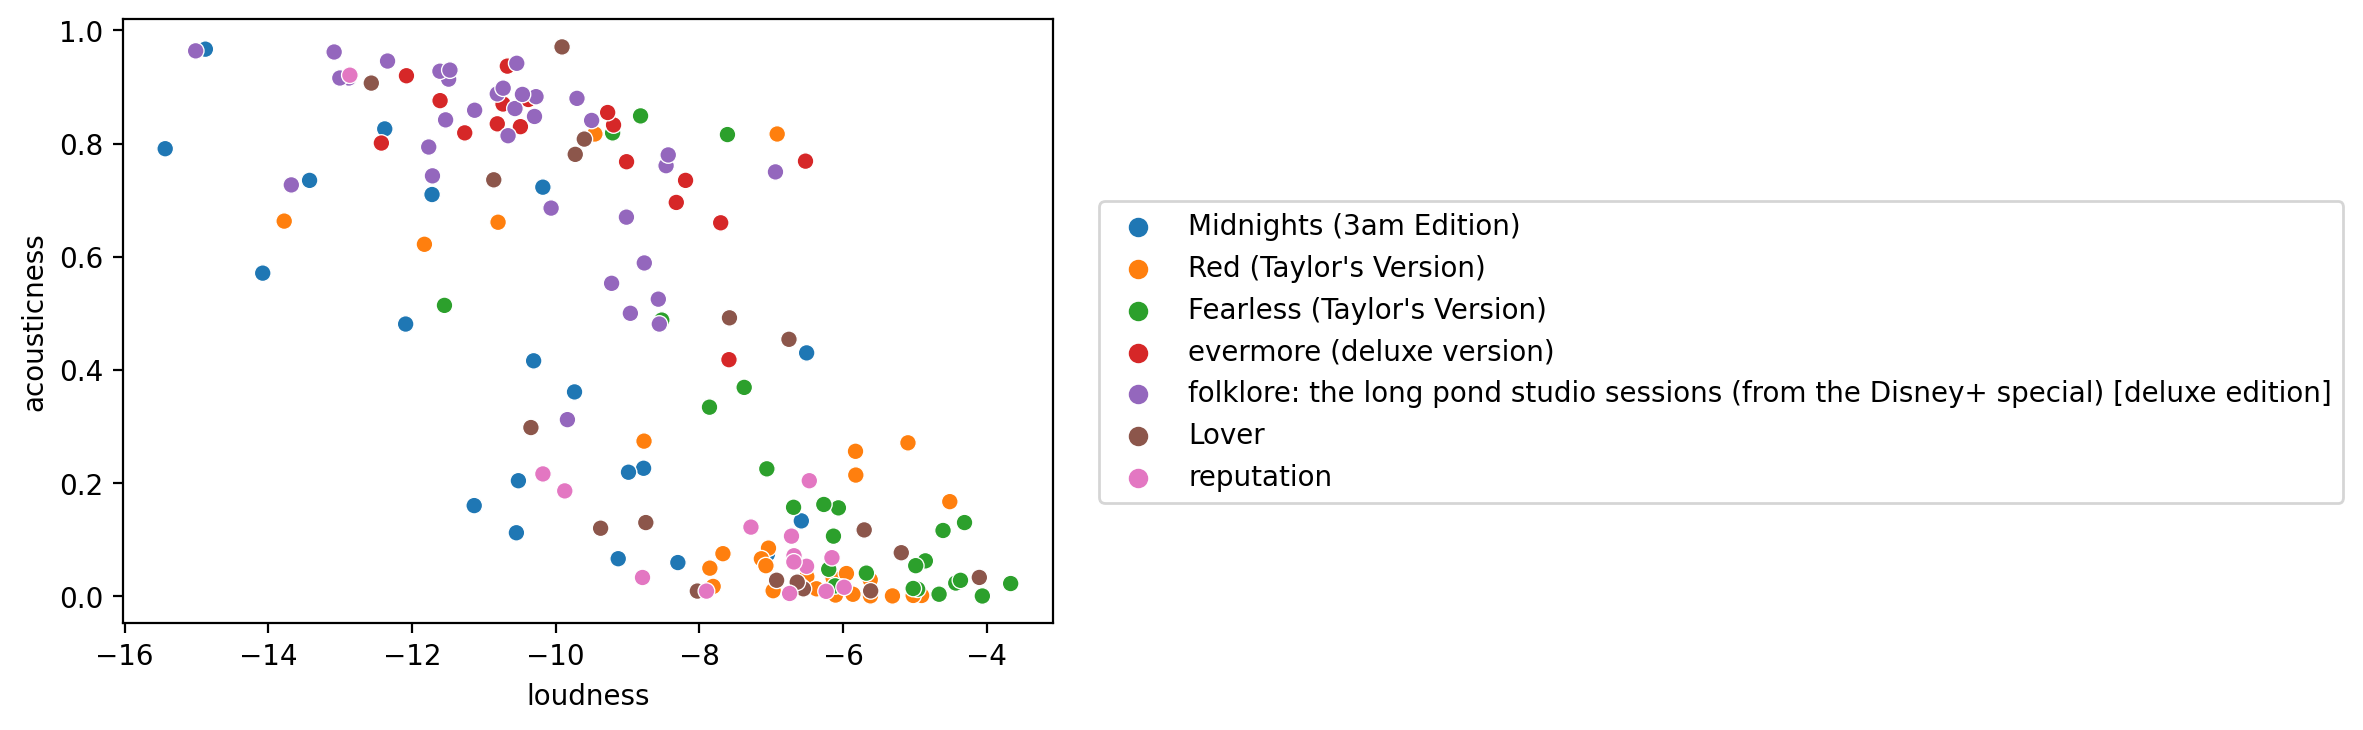

In [90]:
plt.figure(dpi=200)
sns.scatterplot(x='loudness',y='acousticness',data=data_features,hue=df['album_name'])
plt.legend(loc=(1.05,0.2))

If you are familiar with Taylor’s albums, you can see that it makes sense that more folklore and evermore songs are higher on the “acousticness” feature spectrum and lower on the “loudness” feature.

It looks like “reputation” is one of the more distinct albums. Let’s explore Taylor’s songwriting range by finding her most distinct songs.

# Calculating Taylor’s Songwriting Range

Obviously there is a lot of variance in Taylor’s songwriting across albums, but what songs are the most different? We can calculate the euclidean distance between all the songs and then find the largest distance.

In [91]:
distances = scipy.spatial.distance.cdist(data_features, data_features, metric='euclidean')

Here we can see a heatmap of the distance between each song. Obviously, each song will have 0 distance between itself (which is the dark diagonal line you see). But what about this crazy range we see around the 48-50 id mark?

<AxesSubplot:>

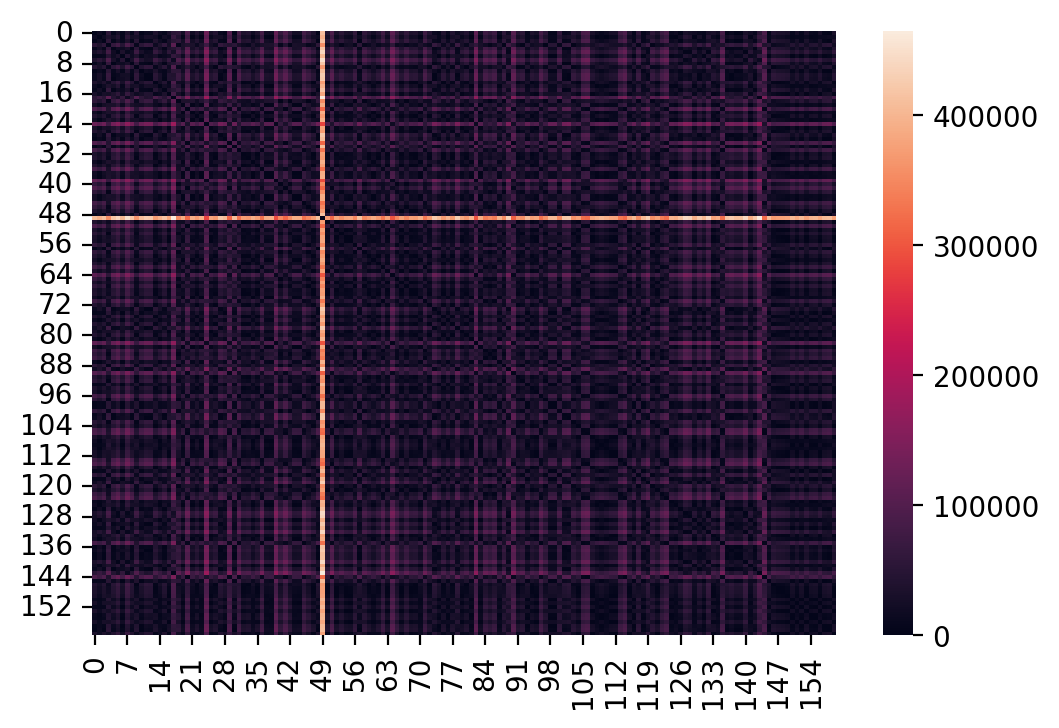

In [92]:
plt.figure(dpi=200)
sns.heatmap(distances)

In [93]:
df[distances==distances.max()][['album_name','track_name']]

,album_name,track_name
id,,
6wAFvJPpTZVirBKGZ4EnMW,Midnights (3am Edition),Glitch
5enxwA8aAbwZbf5qCHORXi,Red (Taylor's Version),All Too Well (10 Minute Version) (Taylor's Ver...


Looks like its “Glitch” from Midnights and “All Too Well (10 Minute Version) (Taylor’s Version)” from the album Red. So what’s the next step? They do differ in the song lengths. Glitch is not very acoustic and more minimal than All Too Well.

Could distance have been a major feature? Let’s try dropping some data features and trying out this analysis again.

In [94]:
no_time = data_features.drop(['duration_ms','time_signature'],axis=1)

In [95]:
distances = scipy.spatial.distance.cdist(no_time, no_time, metric='euclidean')

In [96]:
distances.max()

140.85228039209588

In [97]:
df[distances==distances.max()][['album_name','track_name']]

,album_name,track_name
id,,
5jAIouBES8LWMiriuNq170,Red (Taylor's Version),State Of Grace (Acoustic Version) (Taylor's Ve...
1gaLZjPrDnHQWJds2Jg4KT,folklore: the long pond studio sessions (from ...,this is me trying - the long pond studio sessions


In [98]:
df[distances==distances.max()]['track_name'][0]

"State Of Grace (Acoustic Version) (Taylor's Version)"

### Conclusion

The songs have changed on the basis of max distance. Intuitively, each song should sound more different than the other, and that speaks volumes about Taylor Swift's range and talent. We do get a good idea, though, of how Spotify is able to recommend the next song in our playlists, based on what we listen to. 